# About Project_Flight Price Prediction

Problem Statement:
    
    
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

# FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

We have to build a machine learning model to predict the price of the flight ticket. 

In [1]:
#importing all required library

import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.svm import SVR
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import AdaBoostRegressor
import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
#uploading test dataset
test=pd.read_csv("Flight_test_data.csv")
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info


In [3]:
#uploading train dataset
train=pd.read_csv("Flight_ticket.csv")
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
print(test.info())
print('**********************')
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None
**********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  

In [5]:
print(test.shape)
print('*************')
print(train.shape)

(2671, 10)
*************
(10683, 11)


In [6]:
print(test.dtypes)
print('**************')
print(train.dtypes)

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object
**************
Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object


In [7]:
#lets check the null value in both dataset
print(test.isnull().sum())
print('*****************')
print(train.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64
*****************
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


As we can see that there are no null values in test dataset and in train dartaset 1 null value in route column and 1 in total stops column

In [8]:
train.dropna(inplace = True)

In [9]:
print(train.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [10]:
print(train.Additional_Info.value_counts())
print('*************************************')
print(test.Additional_Info.value_counts())

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64
*************************************
No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Change airports                    1
Business class                     1
Name: Additional_Info, dtype: int64


In [11]:
#we can drop Add_info column from both dataset because there are 80% blank data
test.drop(['Additional_Info'],axis=1,inplace=True)   
train.drop(['Additional_Info'],axis=1,inplace=True)

In [12]:
print(train.Route.value_counts())
print('*************************************')
print(test.Route.value_counts())

DEL ? BOM ? COK                2376
BLR ? DEL                      1552
CCU ? BOM ? BLR                 979
CCU ? BLR                       724
BOM ? HYD                       621
                               ... 
BOM ? NDC ? HYD                   1
CCU ? VTZ ? BLR                   1
BOM ? CCU ? HYD                   1
CCU ? IXA ? BLR                   1
BOM ? BLR ? CCU ? BBI ? HYD       1
Name: Route, Length: 128, dtype: int64
*************************************
DEL ? BOM ? COK                624
BLR ? DEL                      389
CCU ? BOM ? BLR                253
CCU ? BLR                      172
BOM ? HYD                      164
                              ... 
BLR ? BOM ? IDR ? GWL ? DEL      1
BLR ? VGA ? HYD ? DEL            1
CCU ? PAT ? BLR                  1
CCU ? BBI ? IXR ? DEL ? BLR      1
BLR ? NAG ? DEL                  1
Name: Route, Length: 100, dtype: int64


In [13]:
#we can drop Route column from both dataset because there is no need of this coulmn to predict the price of flights
test.drop(['Route'],axis=1,inplace=True)   
train.drop(['Route'],axis=1,inplace=True)

In [14]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


In [15]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops
0,Jet Airways,6/06/2019,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop
1,IndiGo,12/05/2019,Kolkata,Banglore,06:20,10:20,4h,1 stop
2,Jet Airways,21/05/2019,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1 stop
3,Multiple carriers,21/05/2019,Delhi,Cochin,08:00,21:00,13h,1 stop
4,Air Asia,24/06/2019,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,non-stop


Now we will change all object type of values into int and create new columns 

First we will change the values of train dataset

# Treat the catagorical Data

We will use OnehotEncoder for data are not in order and LabelEncoder for the data are in order

# Date_of_Journey Column

In [16]:
#Convert Date_of_Journey feature from string to datetime
train['Date_of_Journey']=pd.to_datetime(train['Date_of_Journey'])
#Extract month and date 
train['Journey_day']=train['Date_of_Journey'].dt.day
train['Journey_month']=train['Date_of_Journey'].dt.month
#Drop Dep_Time Column
train.drop('Date_of_Journey',axis=1,inplace=True)

In [17]:
#Convert Date_of_Journey feature from string to datetime
test['Date_of_Journey']=pd.to_datetime(test['Date_of_Journey'])
#Extract month and date 
test['Journey_day']=test['Date_of_Journey'].dt.day
test['Journey_month']=test['Date_of_Journey'].dt.month
#Drop Dep_Time Column
test.drop('Date_of_Journey',axis=1,inplace=True)

# Dep_Time Column

In [18]:
#Convert Dep_Time feature from string to datetime
train['Dep_Time']=pd.to_datetime(train['Dep_Time'])
#Extract hours and minutes from this Dep_Time 
train['Dep_hour']=train['Dep_Time'].dt.hour
train['Dep_minute']=train['Dep_Time'].dt.minute
#Drop Dep_Time Feature
train.drop('Dep_Time',axis=1,inplace=True)

In [19]:
#Convert Dep_Time feature from string to datetime
test['Dep_Time']=pd.to_datetime(test['Dep_Time'])
#Extract hours and minutes from this Dep_Time 
test['Dep_hour']=test['Dep_Time'].dt.hour
test['Dep_minute']=test['Dep_Time'].dt.minute
#Drop Dep_Time Feature
test.drop('Dep_Time',axis=1,inplace=True)

# Arrival_Time Column

In [20]:
#convert Arrival_Time feature from string to datetime
train['Arrival_Time']=pd.to_datetime(train['Arrival_Time'])
#extract hour and minute from arrival_time
train['Arrival_hour']=train['Arrival_Time'].dt.hour
train['Arrival_minute']=train['Arrival_Time'].dt.minute
#drop Arrival_Time Feature
train.drop('Arrival_Time',axis=1,inplace=True)

In [21]:
#convert Arrival_Time feature from string to datetime
test['Arrival_Time']=pd.to_datetime(test['Arrival_Time'])
#extract hour and minute from arrival_time
test['Arrival_hour']=test['Arrival_Time'].dt.hour
test['Arrival_minute']=test['Arrival_Time'].dt.minute
#drop Arrival_Time Feature
test.drop('Arrival_Time',axis=1,inplace=True)

# Duration Column

In [22]:
#obtain hour and minute from the Duration_column string
duration=list(train['Duration'])
for i in range(len(duration)):
    if (duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i]=duration[i]+' 0m'
        else:
            duration[i]='0h '+duration[i]
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(duration[i].split('h')[0])
    duration_mins.append(duration[i].split('h')[1].split('m')[0])

In [23]:
#duration_hours and duration_mins list to train_data table
train['duration_hours']=duration_hours
train['duration_mins']=duration_mins
#drop Duration column
train.drop('Duration',axis=1,inplace=True)

In [24]:
#test dataset
#obtain hour and minute from the Duration_column string
duration=list(test['Duration'])
for i in range(len(duration)):
    if (duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i]=duration[i]+' 0m'
        else:
            duration[i]='0h '+duration[i]
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(duration[i].split('h')[0])
    duration_mins.append(duration[i].split('h')[1].split('m')[0])

In [25]:
#duration_hours and duration_mins list to train_data table
test['duration_hours']=duration_hours
test['duration_mins']=duration_mins
#drop Duration column
test.drop('Duration',axis=1,inplace=True)

# Airline Column

In [26]:
train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

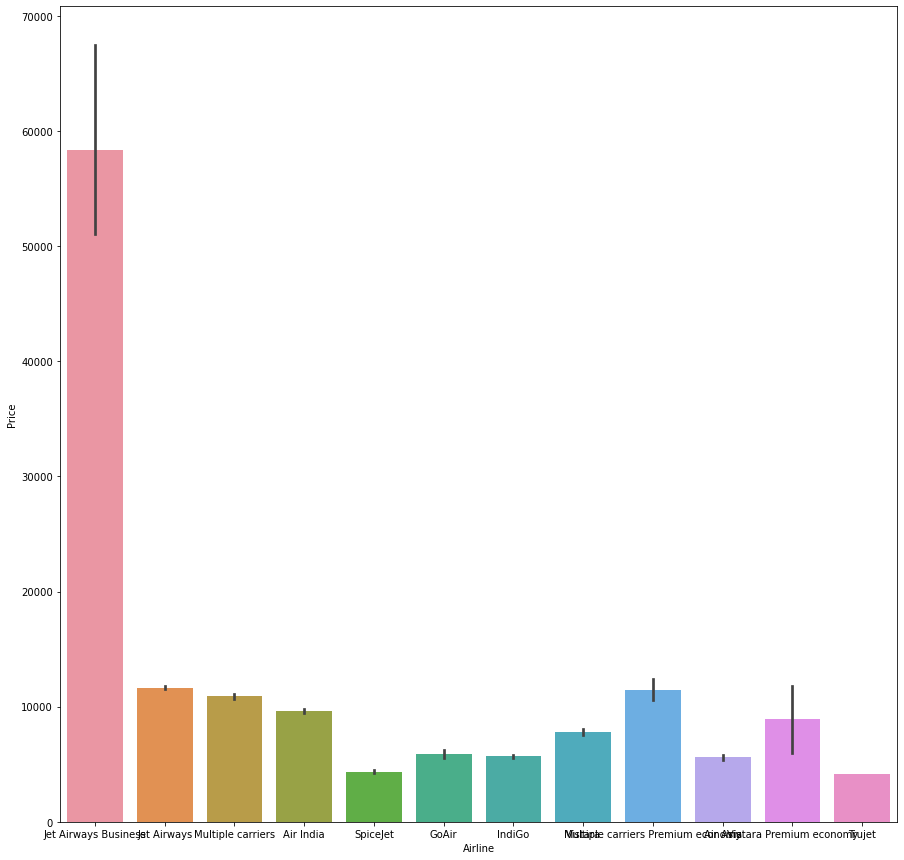

In [27]:
#visualize the prices of Airlines
plt.figure(figsize=(15,15))
sns.barplot(x='Airline',y='Price',data=train.sort_values('Price',ascending=False))
plt.show()

As we can say that only Jet Airways Business is costly,and remaining all are of same median prices.So,it a Nominal value.Use OneHotEncoder for Airline Feature.

OnehotEncoding

In [28]:
#OneHotEncoding
df=pd.get_dummies(train['Airline'],prefix='Airline',drop_first=True)
#merge dummy table and train_data table
train=train.merge(df,left_index=True,right_index=True)
#drop Airline Feature
train.drop('Airline',axis=1,inplace=True)

In [29]:
test['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

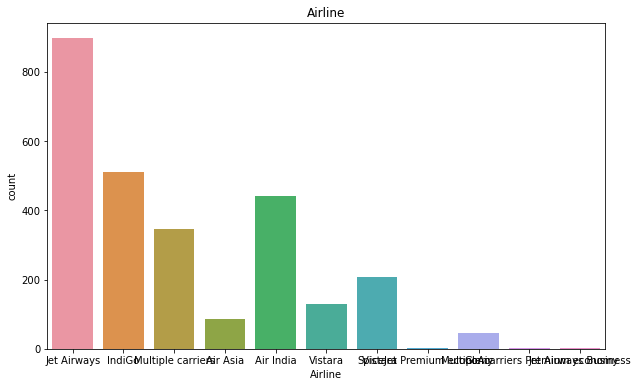

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x='Airline',data=test)
plt.title('Airline')
plt.show()


In [31]:
#test dataset
#OneHotEncoding
df=pd.get_dummies(test['Airline'],prefix='Airline',drop_first=True)
#merge dummy table and train_data table
test=test.merge(df,left_index=True,right_index=True)
#drop Airline Feature
test.drop('Airline',axis=1,inplace=True)

# Source Column

In [32]:
train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

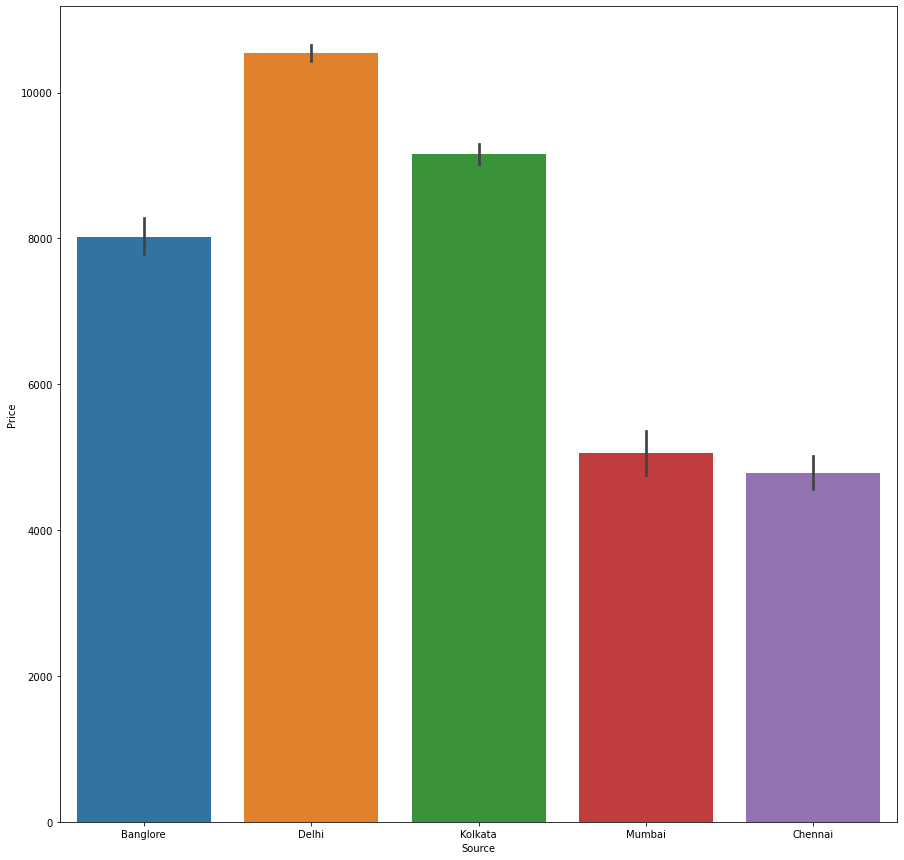

In [33]:
#visualize the prices of Source
plt.figure(figsize=(15,15))
sns.barplot(x='Source',y='Price',data=train.sort_values('Price',ascending=False))
plt.show()

As we can say that only Bangalore have little costlier,and where as remaining all are of same median prices.So,it a Nominal value.Use OneHotEncoder for Source Feature.

In [34]:
#OneHotEncoding
df=pd.get_dummies(train['Source'],prefix='Source',drop_first=True)
#merge dummy table and train_data table
train=train.merge(df,left_index=True,right_index=True)
#drop Airline Feature
train.drop('Source',axis=1,inplace=True)

In [35]:
test['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

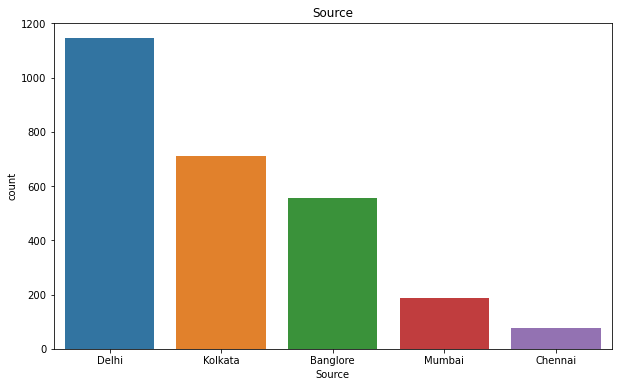

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(x='Source',data=test)
plt.title('Source')
plt.show()

In [37]:
#test dataset
#OneHotEncoding
df=pd.get_dummies(test['Source'],prefix='Source',drop_first=True)
#merge dummy table and train_data table
test=test.merge(df,left_index=True,right_index=True)
#drop Airline Feature
test.drop('Source',axis=1,inplace=True)

# Destination Column

In [38]:
train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

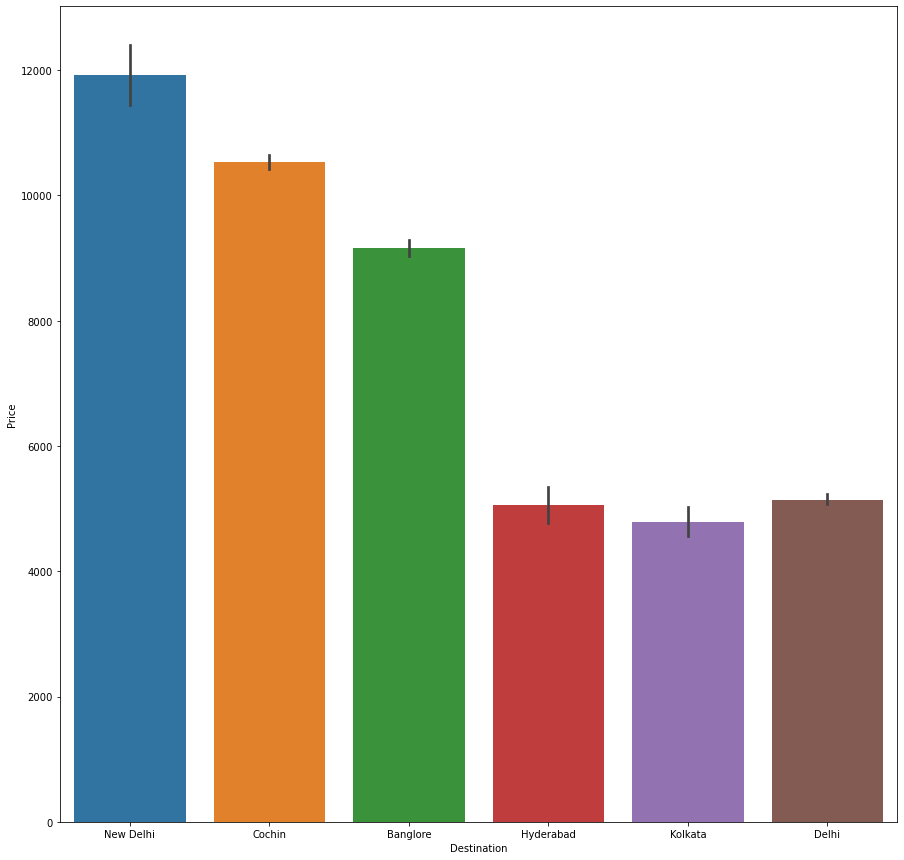

In [39]:
#visualize the prices of Desctination
plt.figure(figsize=(15,15))
sns.barplot(x='Destination',y='Price',data=train.sort_values('Price',ascending=False))
plt.show()

we can say that Destination New Delhi as a slight higher price,where as remaining destinations have the same median prices.So,perfrom oneHotEncoding for Destination feature.

In [40]:
#New Delhi and Delhi are both present in Destination.For no confusion in train_data table convert Delhi->Old Delhi
train['Destination'][train['Destination']=='Delhi']='New Delhi'

In [41]:
train['Destination'].value_counts()

Cochin       4536
Banglore     2871
New Delhi    2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [42]:
#OneHotEncoding
df=pd.get_dummies(train['Destination'],prefix='Destination',drop_first=True)
#merge dummy table and train_data table
train=train.merge(df,left_index=True,right_index=True)
#drop Airline Feature
train.drop('Destination',axis=1,inplace=True)

In [43]:
test['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [44]:
#test dataset
#New Delhi and Delhi are both present in Destination.For no confusion in train_data table convert Delhi->Old Delhi
test['Destination'][test['Destination']=='Delhi']='New Delhi'

In [45]:
test['Destination'].value_counts()

Cochin       1145
Banglore      710
New Delhi     555
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

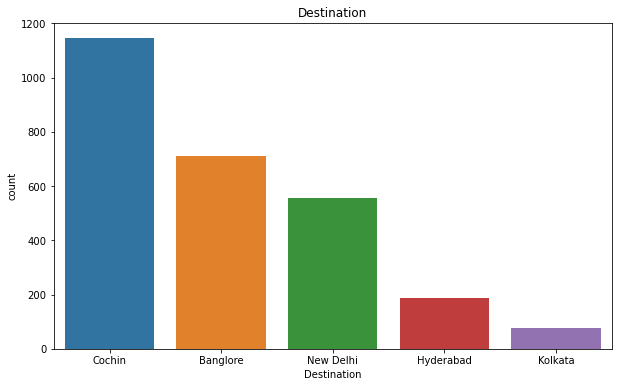

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(x='Destination',data=test)
plt.title('Destination')
plt.show()

In [47]:
#test dataset
#OneHotEncoding
df=pd.get_dummies(test['Destination'],prefix='Destination',drop_first=True)
#merge dummy table and train_data table
test=test.merge(df,left_index=True,right_index=True)
#drop Airline Feature
test.drop('Destination',axis=1,inplace=True)

# Total_Stops Column

In [48]:
train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

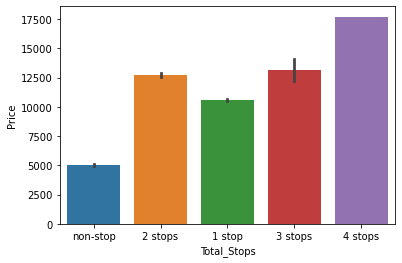

In [49]:
#Total_Stops vs Price
sns.barplot(x='Total_Stops',y='Price',data=train)
plt.show()

we can say that when there is no stop ,price is low and when there is any stop,the price is high.So,perform Label Encoding For Total_Stops 

In [50]:
#Encoding Total_Stops Column into Numeric Values
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [51]:
test['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

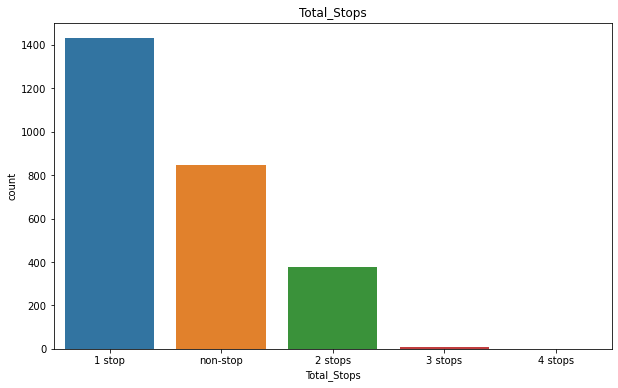

In [52]:
plt.figure(figsize=(10,6))
sns.countplot(x='Total_Stops',data=test)
plt.title('Total_Stops')
plt.show()

In [53]:
#Encoding Total_Stops Column into Numeric Values
le=LabelEncoder()
test.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [54]:
train.head(10)

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hours,duration_mins,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,...,0,0,0,0,1,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,...,0,0,0,1,0,0,1,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,...,0,0,0,0,1,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
5,0,3873,24,6,9,0,11,25,2,25,...,0,0,0,0,1,0,0,0,0,0
6,1,11087,3,12,18,55,10,25,15,30,...,0,0,0,0,0,0,0,0,0,1
7,1,22270,3,1,8,0,5,5,21,5,...,0,0,0,0,0,0,0,0,0,1
8,1,11087,3,12,8,55,10,25,25,30,...,0,0,0,0,0,0,0,0,0,1
9,1,8625,27,5,11,25,19,15,7,50,...,0,0,0,1,0,0,1,0,0,0


In [55]:
test.head(10)

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hours,duration_mins,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,0,1,0,0,1,0,0,0
1,1,5,12,6,20,10,20,4,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,0,1,0,0,1,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,0,0,0,1
5,1,6,12,18,15,12,35,18,20,0,...,0,0,0,1,0,0,1,0,0,0
6,1,3,12,7,30,22,35,15,5,1,...,0,0,0,0,0,0,0,0,0,1
7,1,5,1,15,15,20,30,5,15,0,...,0,0,0,0,1,0,0,0,0,0
8,0,15,3,10,10,12,55,2,45,0,...,0,0,0,0,1,0,0,0,0,0
9,1,18,5,16,30,22,35,6,5,0,...,0,0,0,0,1,0,0,0,0,0


In [56]:
print(train.columns)
print('******************')
print(test.columns)
print('******************')
print(train.shape, test.shape)
print('******************')

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'duration_hours',
       'duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')
******************
Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_minute',
       'Arrival_hour', 'Arrival_minute', 'duration_hours', 'duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline

We sucessfully treated all catsgorical values into numericl values, and now train dataset has 10682 columns and 30 rows.

Test dataset has 2671 columns and 27 rows

# Multivariate Analysis test dataset

In [57]:
test_corr=test.corr()
test_corr

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,-0.042930,0.081326,-0.108388,0.009389,0.033027,-0.113292,0.305269,-0.074220,-0.266022,...,-0.133814,-0.033939,-0.210736,0.465671,0.053317,-0.273551,0.465671,-0.273551,-0.210736,-0.368642
Journey_day,-0.042930,1.000000,-0.258004,-0.022912,-0.025724,0.015416,-0.010006,-0.027683,0.020420,0.016032,...,-0.011314,0.004709,0.011904,0.066892,-0.064940,-0.012886,0.066892,-0.012886,0.011904,-0.007647
Journey_month,0.081326,-0.258004,1.000000,0.007080,0.001781,0.009595,-0.038251,0.020835,0.001954,-0.037015,...,0.010712,-0.023459,0.030135,0.020809,0.058732,-0.042521,0.020809,-0.042521,0.030135,-0.074926
Dep_hour,-0.108388,-0.022912,0.007080,1.000000,-0.034524,0.000147,0.066751,-0.058501,-0.002410,-0.029029,...,0.063316,0.006724,-0.010867,-0.167791,0.166871,0.012869,-0.167791,0.012869,-0.010867,0.019321
Dep_minute,0.009389,-0.025724,0.001781,-0.034524,1.000000,0.046824,-0.020065,-0.006465,0.070123,-0.028656,...,-0.051337,0.028845,0.079943,-0.063457,-0.048981,0.037013,-0.063457,0.037013,0.079943,0.074964
Arrival_hour,0.033027,0.015416,0.009595,0.000147,0.046824,1.000000,-0.136215,0.052411,0.026607,-0.022180,...,0.084724,0.013280,0.006153,-0.015264,0.036062,-0.031102,-0.015264,-0.031102,0.006153,-0.003641
Arrival_minute,-0.113292,-0.010006,-0.038251,0.066751,-0.020065,-0.136215,1.000000,0.078494,0.116729,0.026999,...,0.089228,0.004801,-0.052274,-0.233382,0.117665,0.072541,-0.233382,0.072541,-0.052274,0.132328
Airline_Air India,0.305269,-0.027683,0.020835,-0.058501,-0.006465,0.052411,0.078494,1.000000,-0.058788,-0.216003,...,-0.100042,-0.012157,-0.044936,-0.005340,0.025223,0.037115,-0.005340,0.037115,-0.044936,-0.025938
Airline_GoAir,-0.074220,0.020420,0.001954,-0.002410,0.070123,0.026607,0.116729,-0.058788,1.000000,-0.064387,...,-0.029821,-0.003624,-0.022501,-0.021627,-0.034054,-0.036217,-0.021627,-0.036217,-0.022501,0.095342
Airline_IndiGo,-0.266022,0.016032,-0.037015,-0.029029,-0.028656,-0.022180,0.026999,-0.216003,-0.064387,1.000000,...,-0.109570,-0.013314,0.090180,-0.044342,-0.051351,0.050168,-0.044342,0.050168,0.090180,0.041808


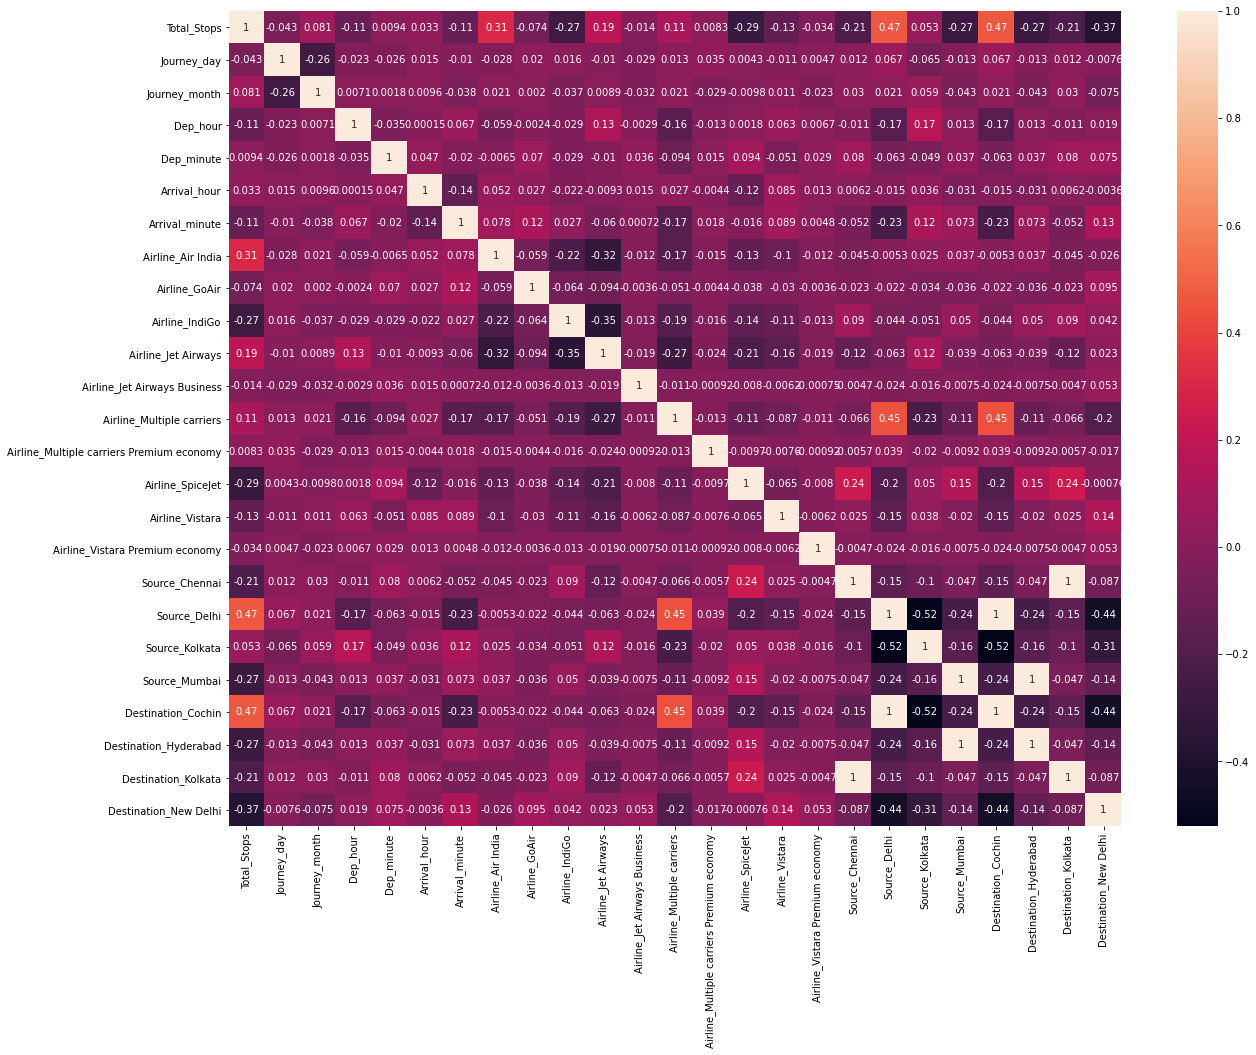

In [58]:
plt.figure(figsize=(20,15))
sns.heatmap(test.corr(),annot=True)
plt.show()

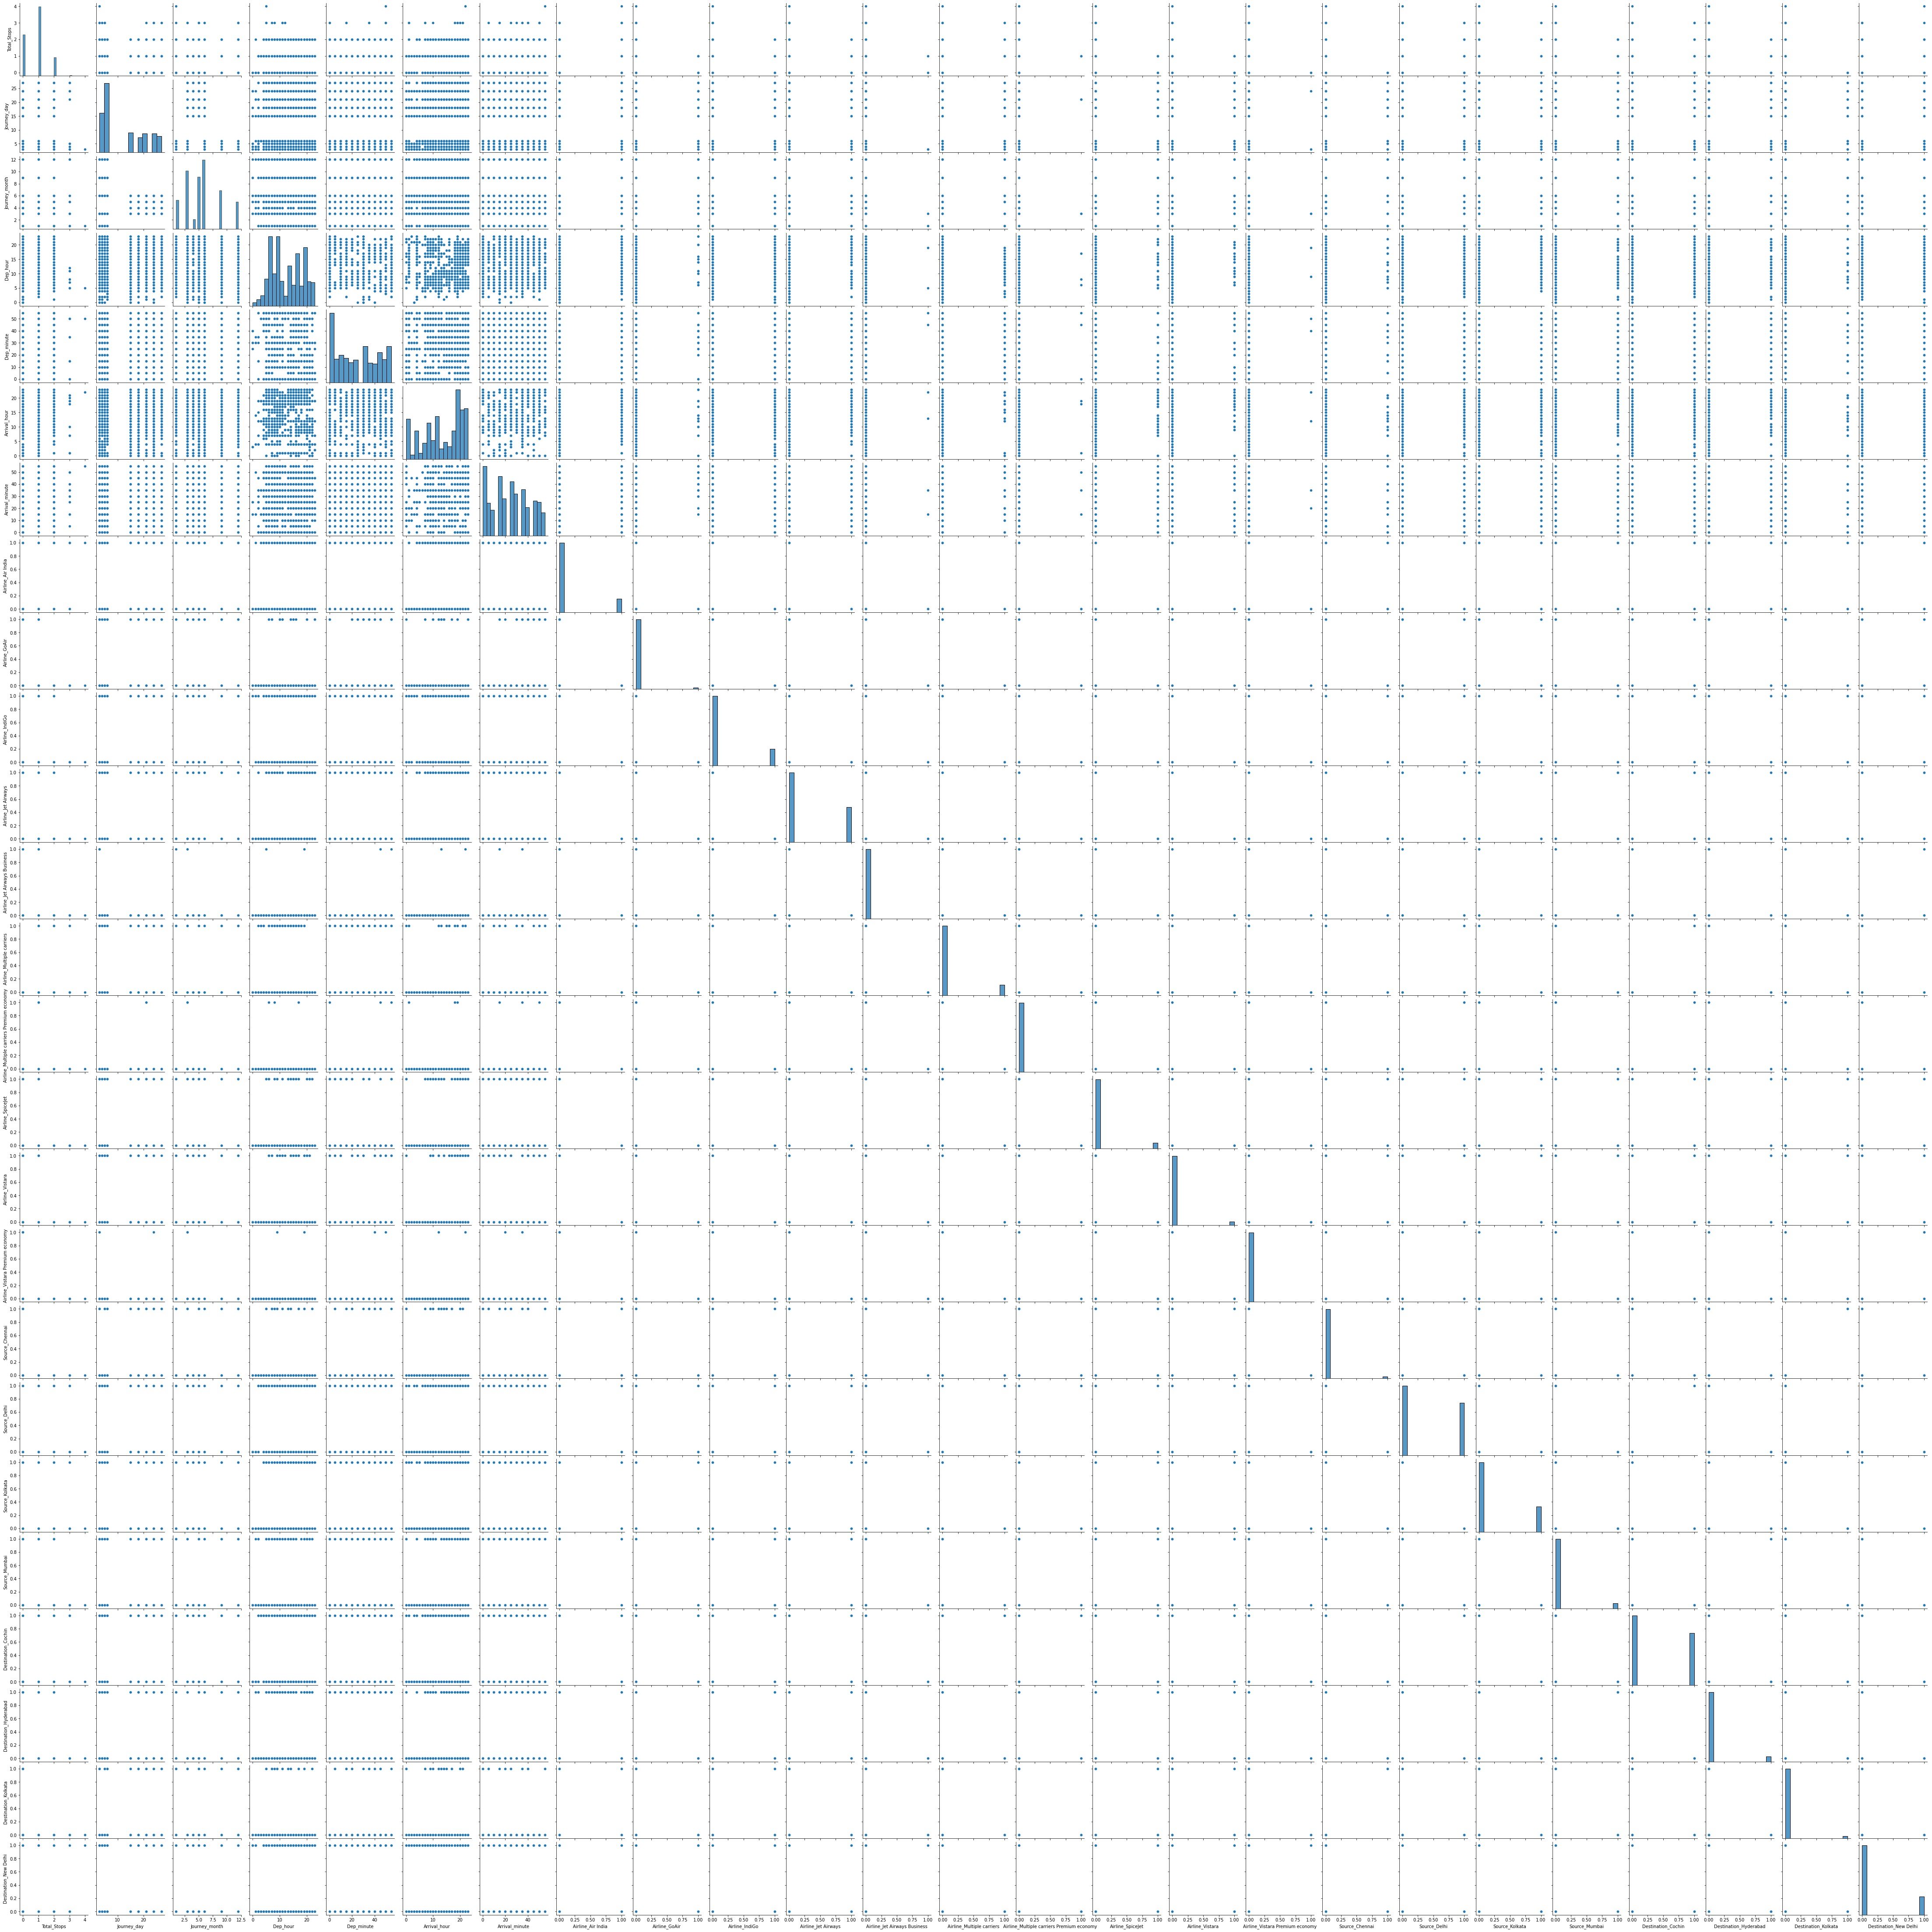

In [96]:
sns.pairplot(test)

# Multivariate Analysis train dataset

In [60]:
train_corr=train.corr()
train_corr

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Airline_Air India,Airline_GoAir,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,0.603897,-0.024136,0.065495,-0.061476,-0.002618,0.038140,-0.106940,0.271094,-0.060110,...,-0.120447,-0.020459,-0.234758,0.490170,0.032761,-0.260752,0.490170,-0.260752,-0.234758,-0.368324
Price,0.603897,1.000000,-0.165448,0.010705,0.006799,-0.024458,0.024244,-0.086155,0.050432,-0.095151,...,-0.060654,-0.000454,-0.179223,0.270676,0.009358,-0.230755,0.270676,-0.230755,-0.179223,-0.118044
Journey_day,-0.024136,-0.165448,1.000000,-0.264896,-0.002301,-0.016433,-0.002176,-0.021423,-0.037279,0.002350,...,-0.015935,-0.017801,0.012202,0.112092,-0.068380,-0.013391,0.112092,-0.013391,0.012202,-0.059495
Journey_month,0.065495,0.010705,-0.264896,1.000000,0.028189,0.002136,-0.004329,-0.025786,-0.000281,-0.017538,...,0.002856,-0.012351,-0.014993,0.008017,0.063601,-0.015696,0.008017,-0.015696,-0.014993,-0.063092
Dep_hour,-0.061476,0.006799,-0.002301,0.028189,1.000000,-0.024745,0.005180,0.067911,-0.012879,-0.016373,...,0.023906,-0.003375,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,-0.017292,-0.014846,-0.007887
Dep_minute,-0.002618,-0.024458,-0.016433,0.002136,-0.024745,1.000000,0.043122,-0.017597,-0.045688,0.076751,...,-0.077903,-0.011380,0.067110,-0.085534,-0.024238,0.037705,-0.085534,0.037705,0.067110,0.077354
Arrival_hour,0.038140,0.024244,-0.002176,-0.004329,0.005180,0.043122,1.000000,-0.154363,0.088872,0.018526,...,0.068834,0.000776,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.033512,-0.014795,-0.024419
Arrival_minute,-0.106940,-0.086155,-0.021423,-0.025786,0.067911,-0.017597,-0.154363,1.000000,0.061231,0.096839,...,0.069422,0.000314,-0.030493,-0.209882,0.118573,0.081196,-0.209882,0.081196,-0.030493,0.090993
Airline_Air India,0.271094,0.050432,-0.037279,-0.000281,-0.012879,-0.045688,0.088872,0.061231,1.000000,-0.060221,...,-0.095939,-0.007421,-0.051068,0.001257,0.023606,0.022268,0.001257,0.022268,-0.051068,-0.017601
Airline_GoAir,-0.060110,-0.095151,0.002350,-0.017538,-0.016373,0.076751,0.018526,0.096839,-0.060221,1.000000,...,-0.029469,-0.002280,-0.026156,-0.009049,-0.042921,-0.035933,-0.009049,-0.035933,-0.026156,0.092099


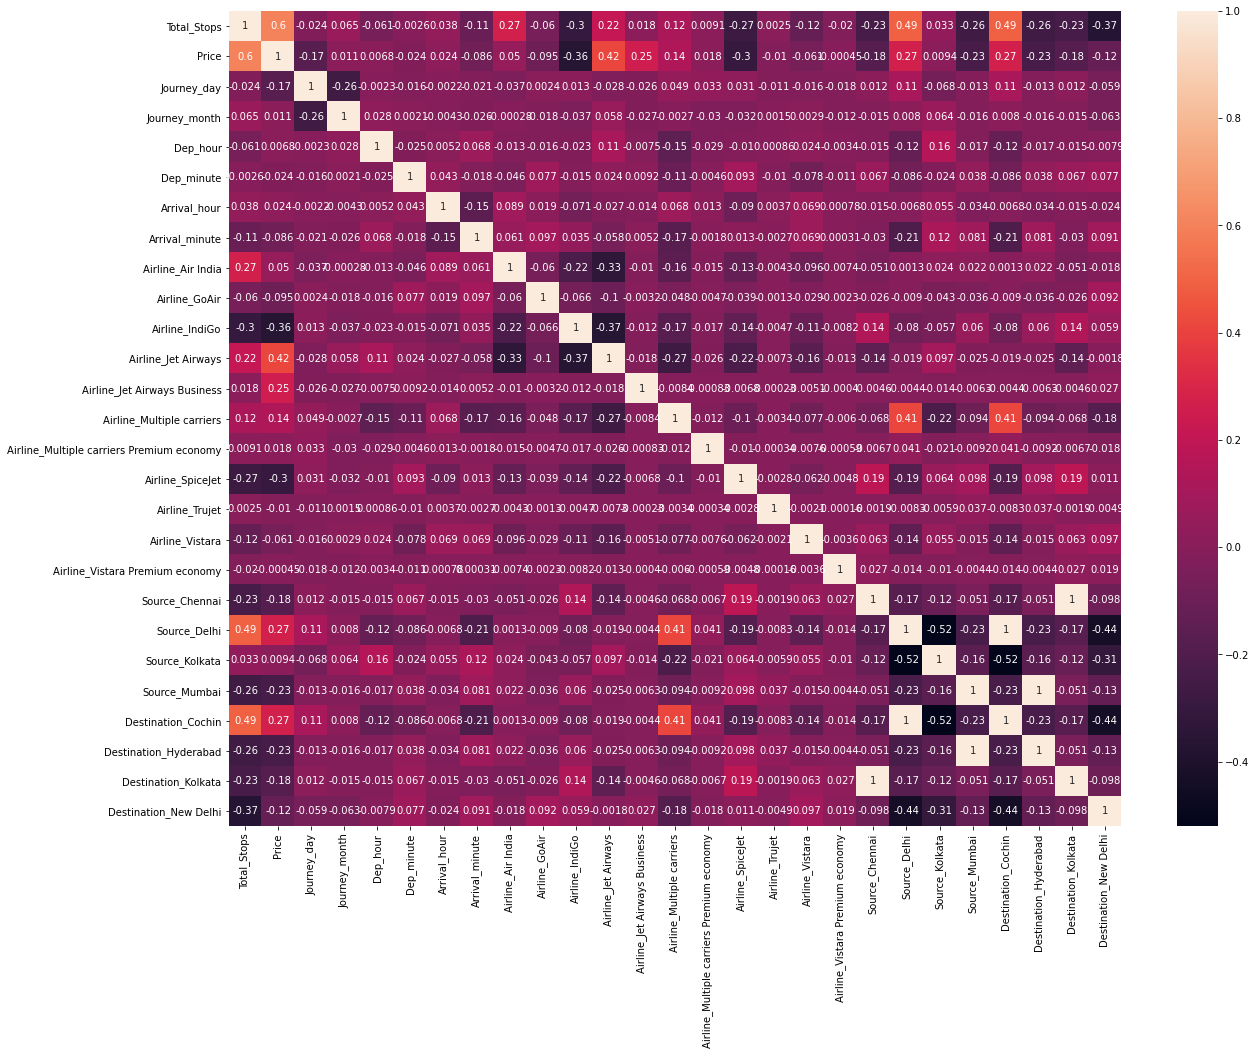

In [61]:
plt.figure(figsize=(20,15))
sns.heatmap(train.corr(),annot=True)
plt.show()

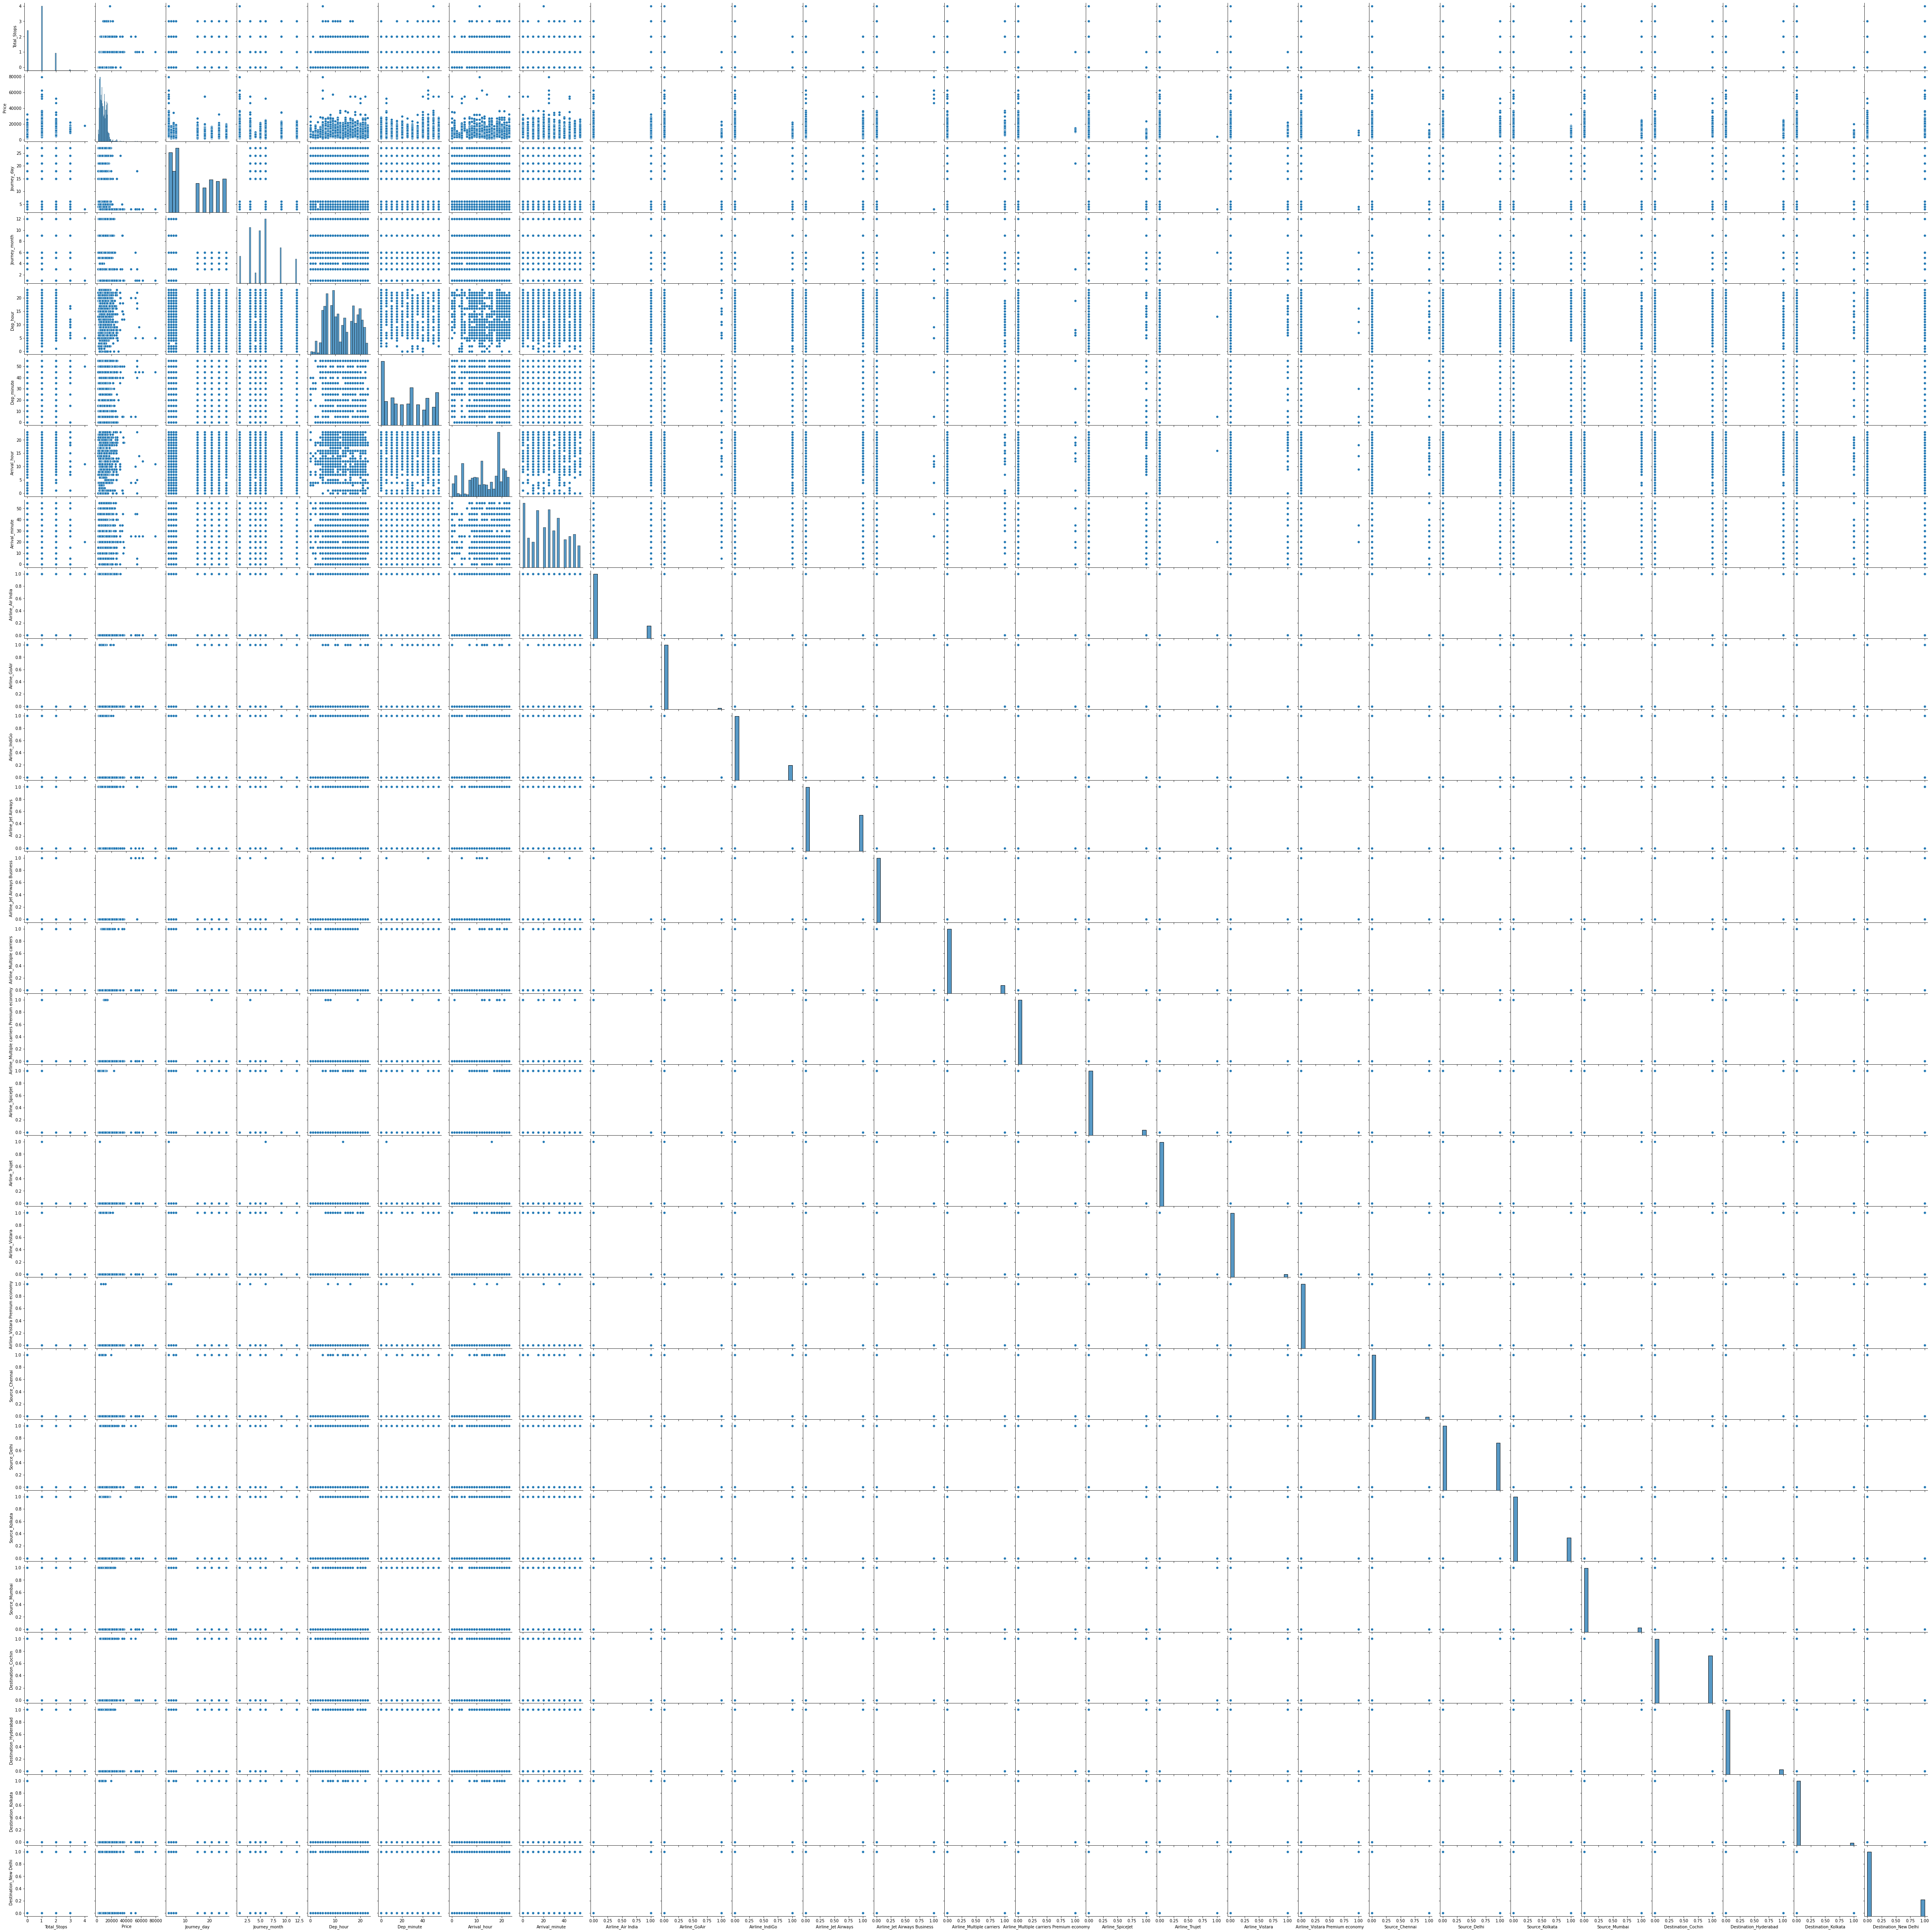

In [97]:
sns.pairplot(train)

# No need to treat and check outliers and skewness because all column and values are important

Target and input variable

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
#seprating data into independent and target variables
train_new=train[['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'duration_hours',
       'duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]

x_train=train_new[['Total_Stops','Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'duration_hours',
       'duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]
y_train=train_new[['Price']]
x_test=test

# Model Run, Train, Test ,Split

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.22,random_state=45)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8331, 28)
(2351, 28)
(8331, 1)
(2351, 1)


we are sending 22% of data for testing 

In [66]:
x_train

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hours,duration_mins,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
7792,2,21,5,18,45,19,15,24,30,1,...,0,0,0,1,0,0,1,0,0,0
5748,1,27,5,4,55,21,0,16,5,0,...,0,0,0,1,0,0,1,0,0,0
10062,2,15,6,11,40,19,0,7,20,0,...,0,0,0,1,0,0,1,0,0,0
3579,1,24,3,21,10,20,40,23,30,0,...,0,0,0,0,1,0,0,0,0,0
668,1,18,5,21,10,10,5,12,55,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8772,0,21,4,22,20,0,40,2,20,0,...,0,0,0,0,1,0,0,0,0,0
163,1,5,9,6,50,16,10,9,20,0,...,0,0,0,1,0,0,1,0,0,0
6012,1,5,12,21,10,10,5,12,55,0,...,0,0,0,0,1,0,0,0,0,0
6558,0,3,1,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
y_train

,Price
7792,12257
5748,8784
10062,18804
3579,10031
668,8586
...,...
8772,4807
163,6442
6012,8586
6558,11934


In [68]:
x_test

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hours,duration_mins,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
6296,0,21,3,13,20,15,35,2,15,0,...,0,0,1,0,0,0,0,0,1,0
62,1,6,3,8,45,19,0,10,15,0,...,0,0,0,1,0,0,1,0,0,0
4165,0,21,4,8,20,11,20,3,0,0,...,0,0,0,0,0,0,0,0,0,1
10333,2,15,5,9,25,17,20,31,55,1,...,0,0,0,0,1,0,0,0,0,0
4131,2,27,5,9,40,4,25,18,45,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7748,0,24,3,7,55,10,15,2,20,0,...,0,0,1,0,0,0,0,0,1,0
1335,0,18,6,19,35,21,5,1,30,0,...,0,0,0,0,0,1,0,1,0,0
8644,0,5,1,9,45,12,0,2,15,0,...,0,0,1,0,0,0,0,0,1,0
866,0,15,3,18,5,21,10,3,5,1,...,0,0,0,1,0,0,1,0,0,0


In [69]:
y_test

,Price
6296,3384
62,12524
4165,7229
10333,13616
4131,13029
...,...
7748,4326
1335,5678
8644,3597
866,4939


As we can see that target variables are continue so we can understand that this is Linear Regression Problem and have to solve with it.

In [70]:
print(x_train.info())
print('********************************')
print(y_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8331 entries, 7792 to 7115
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Total_Stops                                8331 non-null   int64 
 1   Journey_day                                8331 non-null   int64 
 2   Journey_month                              8331 non-null   int64 
 3   Dep_hour                                   8331 non-null   int64 
 4   Dep_minute                                 8331 non-null   int64 
 5   Arrival_hour                               8331 non-null   int64 
 6   Arrival_minute                             8331 non-null   int64 
 7   duration_hours                             8331 non-null   object
 8   duration_mins                              8331 non-null   object
 9   Airline_Air India                          8331 non-null   uint8 
 10  Airline_GoAir                    

# Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


# Prediction_ Random Forest Regressor

In [78]:
rf=LinearRegression()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
predrf
rf.score(x_train,y_train)

0.6190472184715698

In [79]:
print(rf.coef_)
print('*****************')
print(rf.intercept_)
print('***************')

[[ 3.07163467e+03 -8.45992752e+01 -1.23778019e+02  1.24724557e+01
   3.33863942e-01 -8.04500408e+00  2.70540737e+00  1.29764737e+01
  -2.69586835e+00  1.57949801e+03 -2.56976026e+02  3.07374936e+02
   4.23742837e+03  4.84796336e+04  3.80339876e+03  4.97613326e+03
  -2.31766073e+02  1.09139364e-11  2.01914502e+03  3.39835971e+03
   1.42896536e+02 -6.58344123e+01 -1.69403846e+01 -7.12136645e+02
  -6.58344123e+01 -7.12136645e+02  1.42896536e+02  6.52014905e+02]]
*****************
[5762.22852112]
***************


In [80]:
pred=rf.predict(x_test)
print("Predicted value:",pred)
print("actual value:",y_test)

Predicted value: [[ 4335.82601529]
 [11677.93856827]
 [ 8490.9743843 ]
 ...
 [ 5285.73197728]
 [ 5679.46711531]
 [10378.09612852]]
actual value:        Price
6296    3384
62     12524
4165    7229
10333  13616
4131   13029
...      ...
7748    4326
1335    5678
8644    3597
866     4939
9041   13727

[2351 rows x 1 columns]


In [81]:
rf=r2_score(y_test,predrf)
print("R2 score : ",rf*100)

R2 score :  51.45853010195086


In [82]:
predrf=pd.DataFrame(predrf, columns=['Price'])
predrf

,Price
0,4335.826015
1,11677.938568
2,8490.974384
3,11872.115961
4,13381.511145
...,...
2346,3991.516225
2347,6335.272799
2348,5285.731977
2349,5679.467115


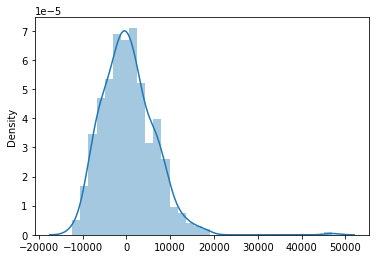

In [83]:
#visualize the Results
sns.distplot(y_test-predrf)
plt.show()

# REGULARIZATION: L1 AND L2 REGULARIZATION

L1- LASSO REGRESSION L2- RIDGE REGRESSION

# LASSO

In [84]:
parameters={"alpha":[.0001,.001,.01,.1,1,10],"random_state":list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [85]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.5145852958663114

In [86]:
ls.coef_

array([ 3.07163552e+03, -8.45993071e+01, -1.23778131e+02,  1.24723996e+01,
        3.33806818e-01, -8.04497688e+00,  2.70539109e+00,  1.29765441e+01,
       -2.69587712e+00,  1.57947403e+03, -2.56991441e+02,  3.07352006e+02,
        4.23740544e+03,  4.84794718e+04,  3.80337467e+03,  4.97603444e+03,
       -2.31786933e+02,  0.00000000e+00,  2.01911994e+03,  3.39749599e+03,
        4.02031337e+02, -5.91758184e+01, -2.20563784e+02, -1.50149219e+03,
       -2.76115682e+02, -1.26400727e+02, -3.19853655e+02,  4.48392568e+02])

In [87]:
cv_score=cross_val_score(ls,x_train,y_train,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.6147582182620492

# Ridge

In [88]:
parameters={"alpha":[.0001,.001,.01,.1,1,10],"random_state":list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [89]:
rd=Ridge(alpha=10,random_state=0)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)

rdr=r2_score(y_test,pred_rd)
rdr

0.5119779973669656

In [90]:
cv_score=cross_val_score(rd,x_train,y_train,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5745541875826994

In [91]:
rd.coef_

array([[ 3.18820667e+03, -8.81588036e+01, -1.34463997e+02,
         1.08059407e+01, -1.29473645e+00, -8.57995958e+00,
         2.17955802e+00,  1.11926637e+01, -3.89553669e+00,
         4.79352099e+02, -1.20050987e+03, -7.15635621e+02,
         3.16122227e+03,  1.77186575e+04,  2.69291584e+03,
         2.04683039e+03, -1.20931732e+03,  0.00000000e+00,
         9.62420485e+02,  2.03329626e+02,  1.54197396e+02,
        -8.70163749e+01, -8.79979597e+01, -6.86772300e+02,
        -8.70163749e+01, -6.86772300e+02,  1.54197396e+02,
         7.07589239e+02]])

# Elasticnet Regression

In [92]:
#Elasticnet is a combination of both Lasso and Ridge
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.6186835505692341


array([ 3.08551279e+03, -8.49929569e+01, -1.24984213e+02,  1.22903467e+01,
        1.56489568e-01, -8.11916319e+00,  2.65639150e+00,  1.26751934e+01,
       -2.81697225e+00,  1.46055088e+03, -3.67161732e+02,  1.95655125e+02,
        4.12186495e+03,  4.52064034e+04,  3.68532386e+03,  4.68361293e+03,
       -3.40253580e+02,  0.00000000e+00,  1.90520108e+03,  2.30673030e+03,
        8.96699210e+01, -1.15987447e+02, -1.63928699e+02, -9.21867511e+02,
       -1.60470231e+02, -6.36791615e+02,  6.36550867e+01,  5.19259531e+02])

We got the best prediction score from randomforest regressor is almost 62% , so we can save aur model with rf

# Saving Model

In [93]:
joblib.dump(lr,"Flight_price_rfr.obj")

['Flight_price_rfr.obj']

In [94]:
DCFfile=joblib.load("Flight_price_rfr.obj")
DCFfile.predict(x_train)

array([[11315.66559891],
       [ 6199.95026404],
       [14034.21459174],
       ...,
       [11351.80068986],
       [ 6535.28242214],
       [ 6908.64793337]])

In [95]:
loaded_model=joblib.load(open("Flight_price_rfr.obj","rb"))
result=loaded_model.score(x_test,y_test)
print(result)

0.5145853010195086
